# Обучение без учителя. Кластеризация


В машинном обучении (ML) есть три главных направления:

- Обучение с учителем - данные представлены набором пар (вход, выход); необходимо
построить правило, которое отображает входы в выходы
регрессия, классификация, обучение ранжированию, обучение метрики, ...

- Обучение без учителя - данные это набор входов; необходимо понять, как они устроены
кластеризация, уменьшение размерности, representation learning, ...

- Обучение с подкреплением - агент взаимодействует с динамической средой, получая
отклик на свои действия; необходимо построить политику, которая говорит, что
необходимо делать в каждый момент, чтобы решить поставленную задачу

Сегодня поговорим о кластеризации - разные методы на простых примерах и парочка приложений

In [1]:
# ! pip install numpy pandas matplotlib
# ! pip install scikit-learn

In [2]:
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.3, palette="Set2")

##### Вообще зачем нужна кластеризация?

- Упростить дальнейшую обработку данных. Разбить множество X на группы схожих объектов, чтобы работать с каждой группой в отдельности.
- Сократить объём хранимых данных. Например, оставив по одному представителю от каждого кластера.
- Поиск объектов, не подходящих ни к одному кластеру (задача поиска
аномалий/выбросов)
- Использовать для разбиения данных на группы. Аналог классификации, но без заранее известных классов

#### Метод k-средних (`k-mean`)
Один из самых простых и интуитивно понятных алгоритмов кластеризации

Нам дана выборка $X = (x_1 , \dots , x_n )$ и задано число кластеров $K$.

Мы хотим минимизировать _суммарное квадратичное отклонение точек кластеров от центров этих кластеров_

Как это можно сделать?

1. Случайным образом инициализируются `K` точек - начальных центроидов $\mu_1, \mu_2, \dots, \mu_K$

Повторяем пункты 2-3, пока $f(x_i)$ не перестанут изменяться

2. Относим каждый объект к ближайшему кластеру: $f(x_i) := \underset{k}{\argmin} ||x_i - \mu_k||^2$ 

3. Пересчитываем новые центры для новых кластеров ($ \dfrac{\sum_{x_i \in C} x_i}{\text{\# точек в кластере}}$)


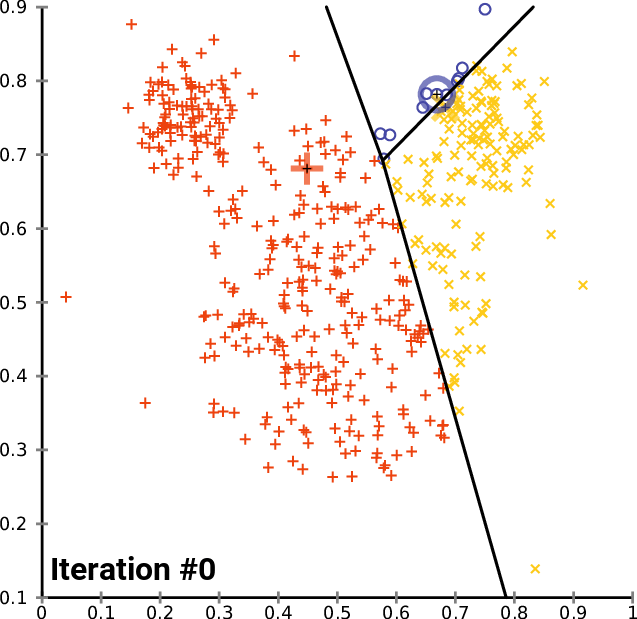

In [3]:
from IPython.display import Image, display

display(Image(filename="assets/K-means_convergence.gif"))

Посчитаем метрику `purity` для k-means с разным k на датасете iris

In [4]:
from sklearn import cluster, datasets

iris = datasets.load_iris()

X_iris, y_iris = iris.data, iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

k_means.labels_, iris.target

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [5]:
# https://stackoverflow.com/questions/34047540/python-clustering-purity-metric

import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

Посчитаем метрику `purity` для кластеризации от 1 до 20 кластеров 

In [6]:
scores=[0]

for n_clusters in range(1, 20):
    k_means = cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(X_iris)
    
    score = purity_score(iris.target, k_means.labels_)
    print("n_clusters:", n_clusters, "score:", score)
    scores.append(score)

n_clusters: 1 score: 0.3333333333333333
n_clusters: 2 score: 0.6666666666666666
n_clusters: 3 score: 0.8866666666666667
n_clusters: 4 score: 0.8466666666666667
n_clusters: 5 score: 0.9066666666666666
n_clusters: 6 score: 0.8933333333333333
n_clusters: 7 score: 0.9
n_clusters: 8 score: 0.9666666666666667
n_clusters: 9 score: 0.96
n_clusters: 10 score: 0.9733333333333334
n_clusters: 11 score: 0.9466666666666667
n_clusters: 12 score: 0.98
n_clusters: 13 score: 0.9733333333333334
n_clusters: 14 score: 0.9733333333333334
n_clusters: 15 score: 0.9666666666666667
n_clusters: 16 score: 0.9733333333333334
n_clusters: 17 score: 0.9733333333333334
n_clusters: 18 score: 0.9733333333333334
n_clusters: 19 score: 0.96


Нарисуем график

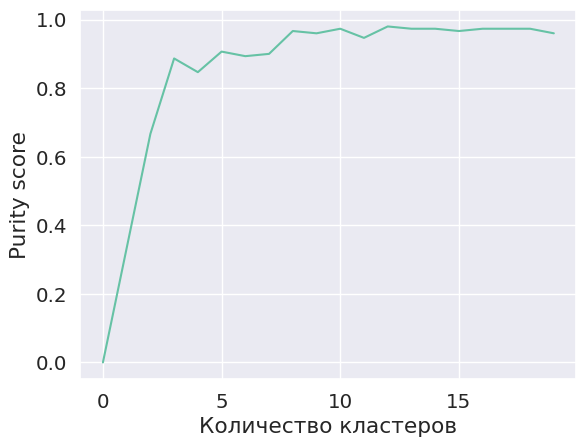

In [7]:
plt.plot(scores)
plt.xlabel("Количество кластеров")
plt.ylabel("Purity score")
plt.show()

С увелечением количества кластеров может увеличиваться и метрика, но мы хотим взять наименьшее значение, на котором `purity` стала адекватной, в данном случае здесь `n_clusters=3`

In [8]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

purity_score(iris.target, k_means.labels_)

np.float64(0.8933333333333333)

Посмотрим, как сопоставляются наши метки истинным кластерами и сколько элементов мы распределили не туда

In [9]:
import pandas as pd # overkill, but still

df = pd.DataFrame()
df["true"] = iris.target
df["cluster"] = k_means.labels_

print(df.groupby(["true", "cluster"]).size())

# видим, что один класс разбивается на два кластера 
# было бы здорово взглянуть на это всё на картинке

true  cluster
0     0          50
1     1          48
      2           2
2     1          14
      2          36
dtype: int64


In [10]:
import matplotlib.pyplot as plt

features = ["sepal length", "sepal width", "petal length", "petal width"]

def draw_projections(X, y):
    fig, axes = plt.subplots(3, 2, figsize=(6, 6))
    
    axes_flat = axes.flatten()
    
    plot_idx = 0
    for f0 in range(len(features)):
        for f1 in range(f0):
            ax = axes_flat[plot_idx]
            
            ax.scatter(X[:, f0], X[:, f1], c=y, cmap=plt.cm.Paired, edgecolors='k')
            
            ax.set_xlabel(features[f0])
            ax.set_ylabel(features[f1])
            
            ax.set_xticks(())
            ax.set_yticks(())
            
            plot_idx += 1

    plt.tight_layout()
    plt.show()

Отрисуем проекции наших данных по всем парам признаков

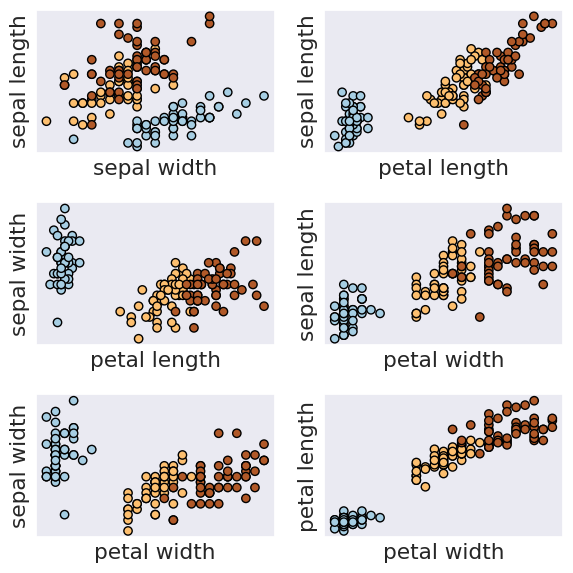

In [11]:
draw_projections(iris.data, iris.target)

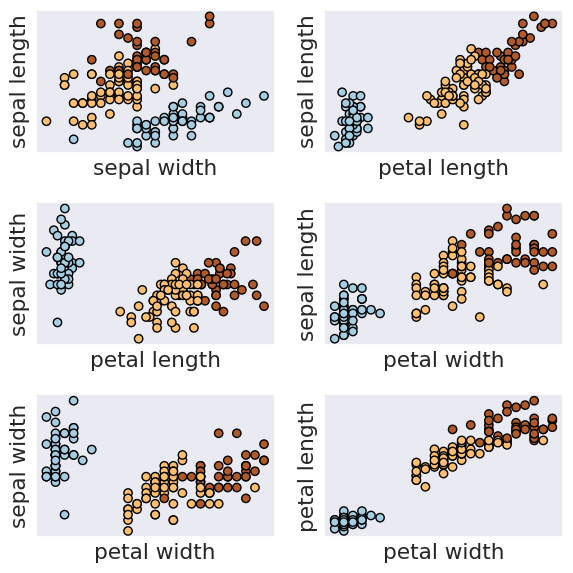

In [12]:
draw_projections(iris.data, k_means.labels_)

## Сжатие картинок

Будем кластеризовать пиксели похожих цветов (значение пикселя = точка в трехмерном пространстве RGB). В каждом кластере заменим все цвета кластера на его медиану, таким образом мы сильно уменьшили количество цветов с $256^3$ до количества кластеров, то есть значительно сжали картинку

In [13]:
# ! pip install scikit-image

/tmp/ipykernel_86171/3641470525.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)


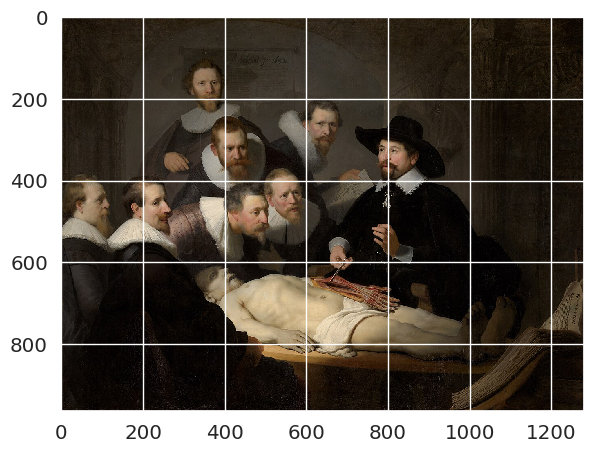

In [14]:
import skimage
from skimage import data, io
from skimage.io import imread, imsave
from sklearn.cluster import KMeans

image = imread("assets/dr_tulp.jpg")
# image = imread("gumilev.jpg")
io.imshow(image)

Рассмотрим картинку как `numpy` массив

In [15]:
float_image = skimage.img_as_float(image, force_copy=True)
# float_image

In [16]:
RGB = np.reshape(float_image.copy(), 
                 (float_image.shape[0] * float_image.shape[1], float_image.shape[2]))
RGB.shape, RGB

((1233920, 3),
 array([[0.09411765, 0.05882353, 0.02352941],
        [0.08627451, 0.05098039, 0.01568627],
        [0.16470588, 0.12941176, 0.09411765],
        ...,
        [0.14901961, 0.12156863, 0.09019608],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.04705882, 0.01960784, 0.        ]], shape=(1233920, 3)))

Для оценивания уровня искажения при сжатии будем использовать метрику `PSNR`

In [17]:
def psnr(X_true, X_clustered):
    
    size = X_true.shape[0] * X_true.shape[1] * X_true.shape[2]
    mse = np.sum((X_true - X_clustered) ** 2) / size
    max_2 = np.max(X_true) ** 2
    
    return 10 * np.log10(max_2 / mse)

Сожмем картинку до 2, ..., 14 цветов с помощью кластеризации

In [18]:
for n_clusters in reversed(range(2, 17)):
    
    print(n_clusters, end=" ")
    
    # группируем цвета, которые есть в изображении
    model = KMeans(n_clusters=n_clusters, verbose=False, random_state=100)
    model.fit(RGB)
    X = RGB.copy()
    
    # запоминаем метки кластеров
    labels = model.labels_.T

    for cluster in range(n_clusters):
        
        # по каким индексам в списке пикселей живёт этот кластер?
        args = np.argwhere(np.equal(cluster, labels)).T[0]
        
        # заполняем кластер средним значением
        if args.shape[0] > 0:
            X[args, :] = np.mean(X[args, :], axis=0)

    # обратно в трёхмерный вид
    im = np.reshape(X, (float_image.shape[0], float_image.shape[1], float_image.shape[2]))
    
    print("Frobenius norm: %3.2f" % np.linalg.norm(im - float_image), end="  ")    
    print("PSNR: %3.3f" % psnr(float_image, im))
    
    rescaled_im = (im * 255).astype(np.uint8)
    
    # сохраняем
    imsave("dr_tulp" + str(n_clusters) + ".png", rescaled_im)

16 Frobenius norm: 38.62  PSNR: 33.948
15 Frobenius norm: 39.74  PSNR: 33.699
14 Frobenius norm: 40.96  PSNR: 33.436
13 Frobenius norm: 42.57  PSNR: 33.101
12 Frobenius norm: 43.84  PSNR: 32.846
11 Frobenius norm: 45.67  PSNR: 32.491
10 Frobenius norm: 47.68  PSNR: 32.118
9 Frobenius norm: 50.76  PSNR: 31.574
8 Frobenius norm: 57.12  PSNR: 30.549
7 Frobenius norm: 60.29  PSNR: 30.079
6 Frobenius norm: 66.09  PSNR: 29.282
5 Frobenius norm: 77.95  PSNR: 27.848
4 Frobenius norm: 91.61  PSNR: 26.445
3 Frobenius norm: 118.88  PSNR: 24.182
2 Frobenius norm: 166.49  PSNR: 21.256


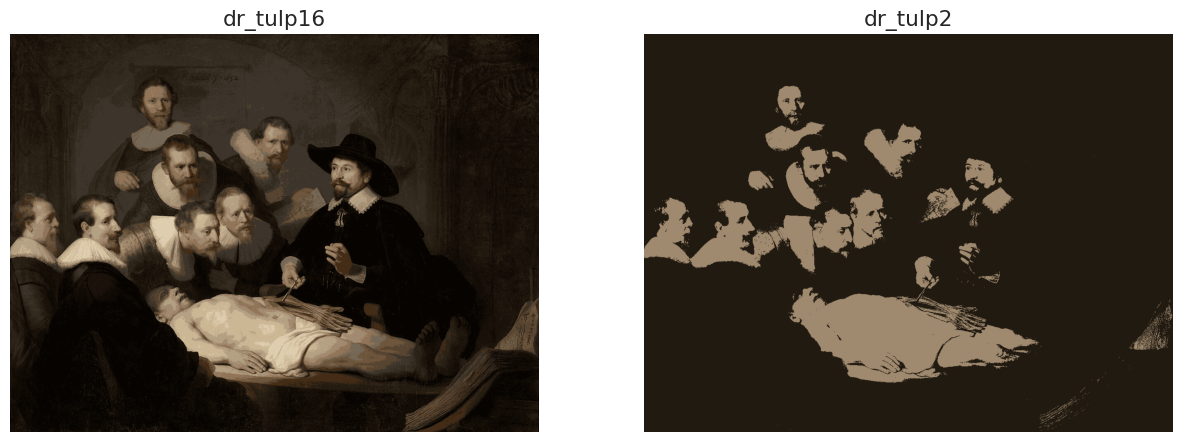

In [19]:
img1 = imread("dr_tulp16.png")
img2 = imread("dr_tulp2.png")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(img1)
axes[0].set_title("dr_tulp16")
axes[0].axis("off")

axes[1].imshow(img2)
axes[1].set_title("dr_tulp2")
axes[1].axis("off")

plt.show()

&#x2753; **Вопрос** &#x2753;

> Во сколько раз легче будет вторая картинка по сравнению с первой при сжатии?

<details>
  <summary> Кликни для показа ответа </summary>
  
> Если мы хешируем цвета и для каждого пикселя пишем конкретный цвет: один из двух или один из 16
> - первая картинка занимает 4 * размер картинки **битов**
> - вторая картинка занимает 1 * размер картинки **битов**
>
> Таким образом, вторая картинка будет в 4 раза легче первой



</details><br/>



### Самостоятельная работа: Palmer Penguins Dataset

Здесь вам предлагается самостоятельно кластеризовать пингвинов по видам и написать соревнование по кластеризации

In [20]:
# ! pip install seaborn

Колонки в данных:
- **species**: вид пингвина (Chinstrap, Adélie, or Gentoo)
- **bill_length_mm**: длина клюва (mm)
- **bill_depth_mm**: глубина клюва (mm)
- **flipper_length_mm**: глубина ласт (mm)
- **body_mass_g**: вес (g)
- **island**: название острова (Dream, Torgersen, or Biscoe)
- **sex**: пол пингвина


In [21]:
# загружаем данные
df = pd.read_csv("datasets/penguins.csv")

df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [22]:
print(f"Строк: {df.shape[0]}")
print(f"Столбцов: {df.shape[1]}")

Строк: 344
Столбцов: 9


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Судя по `Non-Null Count` в некоторых столбцах есть незаполненные клеточки, посмотрим сколько их

In [24]:
# Пропуски
# Что с ними делать?
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Как распределены пингвины по классам? Заметим, что проекция на длины клюва и ласт неплохо разделяет на кластеры

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

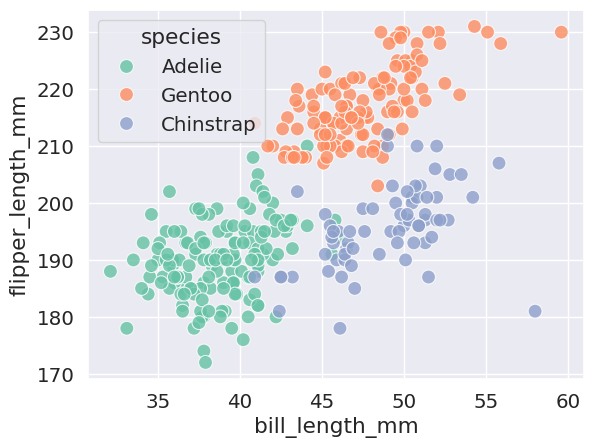

In [25]:
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',  # Красим по видам (это наш "ответ")
    s=100,          # Размер точек
    alpha=0.8       # Прозрачность
)

In [26]:
print(*df.columns, sep='\n')

rowid
species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


Посмотрим на всех признаки и оставим среди них только полезные для кластеризации

In [27]:
# Очищаем данные - нам не нужны ID строки, год наблюдения - это всё точно не влияет на вид
# Можно выбросить и другие признаки

train_df = df.copy()
cols_to_drop = ['rowid', 'species', 'island', 'sex', 'year']

X = train_df.drop(columns=cols_to_drop)

# Что делать с пропусками? Самый простой способ - забить
X = X.dropna() # выкинули все строки с NaN

print(f"\nРазмер данных после очистки: {X.shape}")
X.head()


Размер данных после очистки: (342, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Подумайте, что будет если не нормализовать данные. К примеру `bill_depth` у нас в миллиметрах и порядка десятков, а `body_mass` в граммах и порядка нескольких тысяч

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Масштабируем
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Превратим обратно в таблицу для удобства просмотра
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 2. Создаем модель K-Means
# Мы знаем, что видов пингвинов 3, поэтому ищем 3 кластера
kmeans = KMeans(n_clusters=3, random_state=42)

# 3. Обучаем
kmeans.fit(X_scaled)

# 4. Получаем предсказания (0, 1 или 2)
labels = kmeans.labels_

# Добавим предсказания к нашим данным, чтобы нарисовать
X['cluster'] = labels


Сравним истинное разбиение по классам с нашей кластеризацией. Получилось довольно похоже!

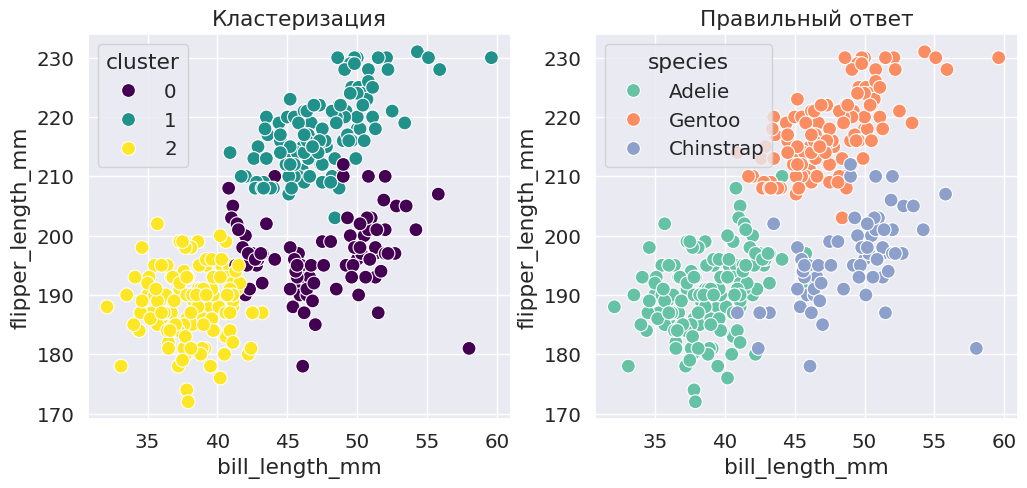

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='bill_length_mm', y='flipper_length_mm', hue='cluster', palette='viridis', s=100)
plt.title("Кластеризация")

real_species = df.loc[X.index, 'species']
plt.subplot(1, 2, 2)
sns.scatterplot(x=X['bill_length_mm'], y=X['flipper_length_mm'], hue=real_species, s=100)
plt.title("Правильный ответ")

plt.show()
